#  StarDetect: Advanced Face Recognition System

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import zipfile
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!unzip '/content/drive/MyDrive/data_set/Celebrity_pics.zip' -d extracted_files

In [4]:
img=cv2.imread('extracted_files/Celebrity_pics/Nayan_Thara/NN34.jpg')

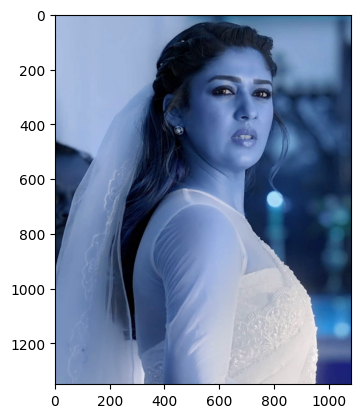

In [5]:
plt.imshow(img)


In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1350, 1080)

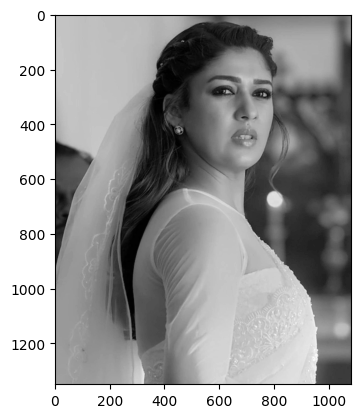

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

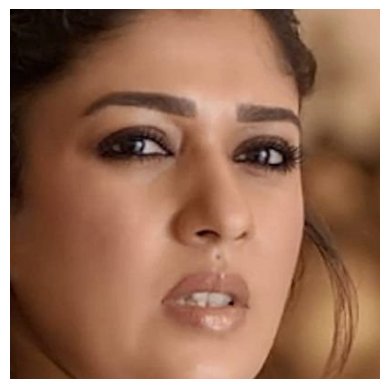

In [9]:
# Load the image
image = cv2.imread('extracted_files/Celebrity_pics/Nayan_Thara/NN34.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
face = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterate over detected faces
for (x, y, w, h) in face:
    # Crop the face from the image
    face = image[y:y+h, x:x+w]

    # Detect eyes within the face region
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
        # Display the cropped face where both eyes are visible.
      plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
      plt.axis('off')
      plt.show()

In [ ]:
path_to_data = "extracted_files/Celebrity_pics"
path_to_cr_data = "/content/drive/MyDrive/data_set/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['extracted_files/Celebrity_pics/Fahad_Fazil',
 'extracted_files/Celebrity_pics/Sharukh_Khan',
 'extracted_files/Celebrity_pics/Alia_Bhutt',
 'extracted_files/Celebrity_pics/Ryan_Gossling',
 'extracted_files/Celebrity_pics/Nayan_Thara',
 'extracted_files/Celebrity_pics/Manju_Varrier']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Fahad_Fazil
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Sharukh_Khan
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Alia_Bhutt
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Ryan_Gossling
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Nayan_Thara
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Manju_Varrier


##**Feature Extraction**

In [ ]:
import pywt


def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

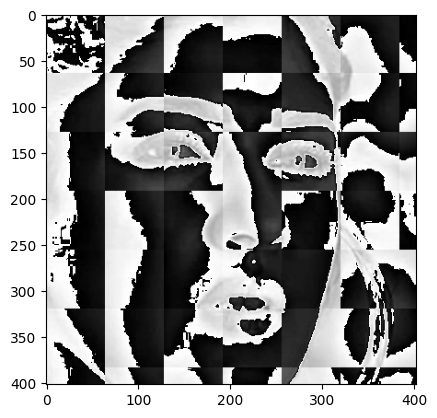

In [ ]:
im_har = w2d(face,'haar',6)
plt.imshow(im_har, cmap='gray')

In [ ]:
!pip install Pillow

In [ ]:
cropped_image_dirs=['/content/drive/MyDrive/data_set/cropped/Sharukh_Khan',
                    '/content/drive/MyDrive/data_set/cropped/Alia_Bhutt',
                    '/content/drive/MyDrive/data_set/cropped/Manju_Varrier',
                    '/content/drive/MyDrive/data_set/cropped/Ryan_Gossling',
                    '/content/drive/MyDrive/data_set/cropped/Nayan_Thara',
                    '/content/drive/MyDrive/data_set/cropped/Fahad_Fazil']

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Sharukh_Khan': ['/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan1.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan2.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan3.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan4.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan5.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan6.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan7.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan9.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan10.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan11.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan12.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan13.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Sharukh_Khan': 0,
 'Alia_Bhutt': 1,
 'Manju_Varrier': 2,
 'Ryan_Gossling': 3,
 'Nayan_Thara': 4,
 'Fahad_Fazil': 5}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
type(X)

list

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(0, 4096)

In [ ]:
X

array([[ 15.,  15.,  15., ...,   1., 249., 252.],
       [  0.,   0.,   0., ...,   1.,   0.,   0.],
       [ 17.,  15.,  15., ..., 244., 237., 234.],
       ...,
       [104., 109., 112., ...,  82.,   6.,   6.],
       [251., 245., 240., ..., 234., 225.,  61.],
       [123., 125., 132., ..., 183.,   4., 250.]])

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6981132075471698

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.75      0.43      0.55         7
           2       0.70      0.64      0.67        11
           3       0.91      1.00      0.95        10
           4       0.89      1.00      0.94         8
           5       0.50      0.71      0.59         7

    accuracy                           0.70        53
   macro avg       0.70      0.70      0.69        53
weighted avg       0.70      0.70      0.69        53



In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
X,y=[],[]
for celeb, images in celebrity_file_names_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (128, 128))  # Resize the image
        nor_img = resized_img / 255.0  # Normalize the resized image
        X.append(nor_img)
        y.append(class_dict[celeb])

In [ ]:
len(X)

210

In [ ]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

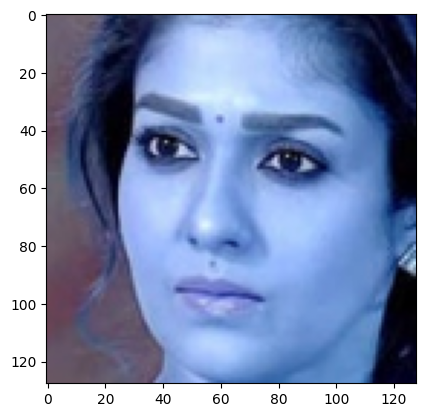

In [ ]:
plt.imshow(X[46])

In [ ]:
y[46]

4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_stacked = np.stack(X_train)
X_reshaped = X_stacked.reshape(-1, 128, 128, 3)
X_train = X_reshaped.astype('float32')

In [ ]:
X_train.shape

(157, 128, 128, 3)

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import Sequential,models,layers,regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # Number of classes as the output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
history=model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 5s 299ms/step - loss: 2.0692 - accuracy: 0.1600 - val_loss: 1.7729 - val_accuracy: 0.3438
Epoch 2/10
4/4 [==============================] - 0s 26ms/step - loss: 1.7738 - accuracy: 0.2480 - val_loss: 1.7734 - val_accuracy: 0.3125
Epoch 3/10
4/4 [==============================] - 0s 27ms/step - loss: 1.7374 - accuracy: 0.3440 - val_loss: 1.7440 - val_accuracy: 0.3750
Epoch 4/10
4/4 [==============================] - 0s 28ms/step - loss: 1.6642 - accuracy: 0.4240 - val_loss: 1.6917 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 0s 30ms/step - loss: 1.4977 - accuracy: 0.5920 - val_loss: 1.5620 - val_accuracy: 0.4375
Epoch 6/10
4/4 [==============================] - 0s 26ms/step - loss: 1.2004 - accuracy: 0.5840 - val_loss: 1.2726 - val_accuracy: 0.6250
Epoch 7/10
4/4 [==============================] - 0s 29ms/step - loss: 0.8828 - accuracy: 0.6880 - val_loss: 1.1398 - val_accuracy: 0.4688
Epoch 8/10
4/4 [==========

In [ ]:
X_stacked = np.stack(X_test)
X_reshaped = X_stacked.reshape(-1, 128, 128, 3)
X_test = X_reshaped.astype('float32')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 176ms/step - loss: 1.2535 - accuracy: 0.5283
Test accuracy: 0.5283018946647644


2/2 [==============================] - 1s 155ms/step - loss: 2.0052 - accuracy: 0.4906
Test accuracy: 0.49056604504585266


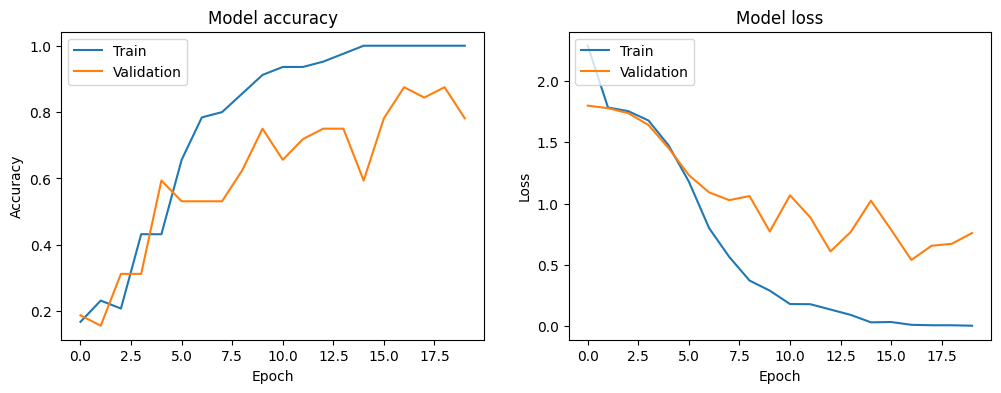

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [ ]:
num_augmentations = 20
X_train_augmented = []
y_train_augmented = []

In [ ]:
for i in range(len(X_train)):
    x = X_train[i].reshape((1,) + X_train[i].shape)  # Reshape the image to (1, 128, 128, 3)
    y = y_train[i]

    # Generate augmented images
    aug_iter = datagen.flow(x, batch_size=1)
    for _ in range(num_augmentations):
        aug_image = next(aug_iter)[0]  # Extract the image from the batch
        X_train_augmented.append(aug_image)
        y_train_augmented.append(y)

In [ ]:
len(X_train_augmented)

3140

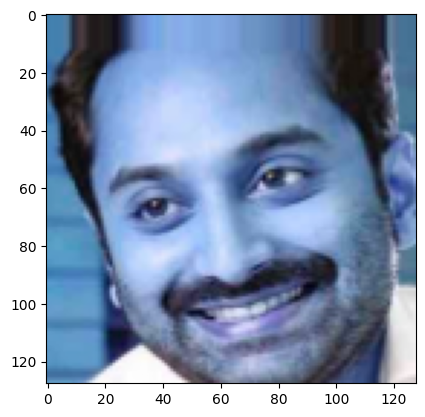

In [ ]:
plt.imshow(X_train_augmented[458])

In [ ]:
# Convert lists to numpy arrays
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# Append the augmented images and labels to the original dataset
X_train_expanded = np.concatenate((X_train, X_train_augmented), axis=0)
y_train_expanded = np.concatenate((y_train, y_train_augmented), axis=0)

In [ ]:
print("Original X_train shape:", X_train.shape)
print("Expanded X_train shape:", X_train_expanded.shape)
print("Original y_train shape:", y_train.shape)
print("Expanded y_train shape:", y_train_expanded.shape)

Original X_train shape: (157, 128, 128, 3)
Expanded X_train shape: (3297, 128, 128, 3)
Original y_train shape: (157,)
Expanded y_train shape: (3297,)


In [ ]:
X_train_expanded,y_train_expanded=shuffle(X_train_expanded,y_train_expanded,random_state=42)

In [ ]:
X_train_expanded.shape

(3297, 128, 128, 3)

In [ ]:
model_aug = models.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(6)
])

model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
history_aug=model_aug.fit in(X_train_expanded, y_train_expanded, epochs=10, validation_split=0.2)

Epoch 1/10
83/83 [==============================] - 45s 495ms/step - loss: 1.5048 - accuracy: 0.3777 - val_loss: 1.0185 - val_accuracy: 0.6409
Epoch 2/10
83/83 [==============================] - 45s 546ms/step - loss: 0.6824 - accuracy: 0.7607 - val_loss: 0.6334 - val_accuracy: 0.7970
Epoch 3/10
83/83 [==============================] - 42s 508ms/step - loss: 0.3440 - accuracy: 0.8824 - val_loss: 0.3837 - val_accuracy: 0.8742
Epoch 4/10
83/83 [==============================] - 43s 516ms/step - loss: 0.1847 - accuracy: 0.9401 - val_loss: 0.3262 - val_accuracy: 0.8727
Epoch 5/10
83/83 [==============================] - 41s 491ms/step - loss: 0.1725 - accuracy: 0.9446 - val_loss: 0.2627 - val_accuracy: 0.9030
Epoch 6/10
83/83 [==============================] - 45s 543ms/step - loss: 0.0883 - accuracy: 0.9693 - val_loss: 0.2818 - val_accuracy: 0.8939
Epoch 7/10
83/83 [==============================] - 44s 528ms/step - loss: 0.0419 - accuracy: 0.9879 - val_loss: 0.1447 - val_accuracy: 0.9470

2/2 [==============================] - 0s 80ms/step - loss: 1.2356 - accuracy: 0.7547
Test accuracy: 0.7547169923782349


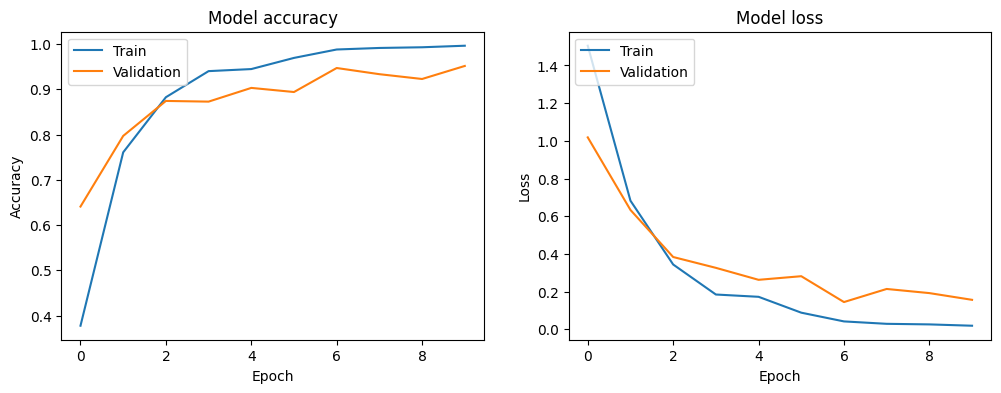

In [ ]:
test_loss, test_acc = model_aug.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_aug2 = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(6)
])

model_aug2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)



In [ ]:
history_aug2 = model_aug2.fit(
    X_train_expanded, y_train_expanded,
    epochs=15,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/15
83/83 [==============================] - 53s 639ms/step - loss: 1.9628 - accuracy: 0.2859 - val_loss: 1.7526 - val_accuracy: 0.3939
Epoch 2/15
83/83 [==============================] - 54s 650ms/step - loss: 1.3534 - accuracy: 0.5264 - val_loss: 1.1123 - val_accuracy: 0.6727
Epoch 3/15
83/83 [==============================] - 52s 630ms/step - loss: 1.0254 - accuracy: 0.6523 - val_loss: 0.9248 - val_accuracy: 0.7348
Epoch 4/15
83/83 [==============================] - 52s 626ms/step - loss: 0.9004 - accuracy: 0.6955 - val_loss: 0.7316 - val_accuracy: 0.8015
Epoch 5/15
83/83 [==============================] - 58s 698ms/step - loss: 0.7170 - accuracy: 0.7823 - val_loss: 0.6723 - val_accuracy: 0.8258
Epoch 6/15
83/83 [==============================] - 52s 624ms/step - loss: 0.6668 - accuracy: 0.8066 - val_loss: 0.5672 - val_accuracy: 0.8697
Epoch 7/15
83/83 [==============================] - 54s 657ms/step - loss: 0.6116 - accuracy: 0.8381 - val_loss: 0.5382 - val_accuracy: 0.8803

2/2 [==============================] - 0s 99ms/step - loss: 1.3291 - accuracy: 0.6792
Test accuracy: 0.6792452931404114


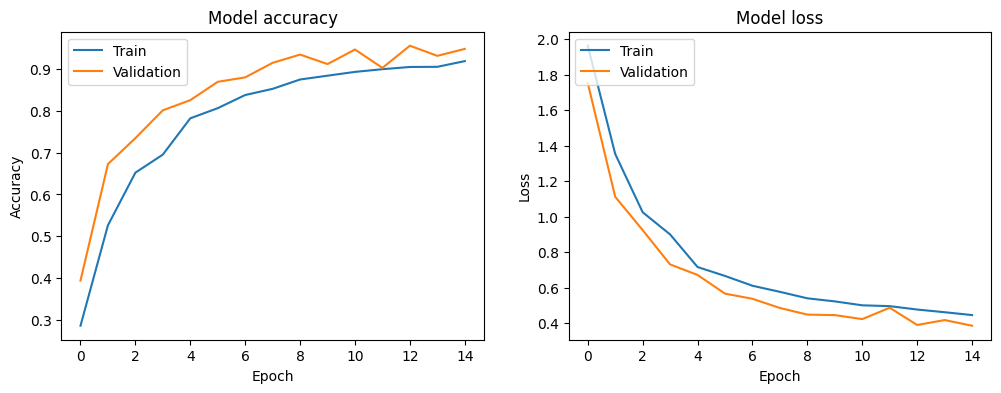

In [ ]:
test_loss, test_acc = model_aug2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_aug2.history['accuracy'])
plt.plot(history_aug2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_aug2.history['loss'])
plt.plot(history_aug2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_aug2.save('my_model_aug2.h5')  # Save the model in HDF5 format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp my_model_aug2.h5 /content/drive/MyDrive/

In [ ]:
import pickle

# Assuming `model` is your trained model
with open('model_aug2_1.pkl', 'wb') as file:
    pickle.dump(model_aug2, file)

In [ ]:
# Copy the model to Google Drive
!cp model_aug2_1.pkl /content/drive/MyDrive/

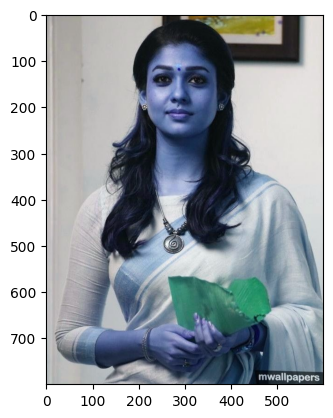

In [ ]:
real_img=cv2.imread('/content/extracted_files/Celebrity_pics/Nayan_Thara/NN1.jpg')
plt.imshow(real_img)

In [ ]:
real_img=cv2.imread('/content/OIP.jpeg')
face_img= get_cropped_image_if_2_eyes(real_img)
if face_img is None:
  print("Face not found")
else:
    resized_image = cv2.resize(face_img, (128, 128))
    normalized_image = resized_image / 255.0

    input_image = np.expand_dims(normalized_image, axis=0)

    predictions = model_aug2.predict(input_image)
    predicted_class = np.argmax(predictions)
    if predicted_class==0:
      print("It is Sharukh Khan")
    elif predicted_class==1:
      print("It is Aliya Bhatt")
    elif predicted_class==2:
      print("It is Manju Varrier")
    elif predicted_class==3:
      print("It is Ryan Gossling")
    elif predicted_class==4:
      print("It is Nayan Thara")
    else:
      print("It is Fahad Fazil")

TypeError: Can't convert object to 'str' for 'filename'